In [ ]:
# This file is to evaluate EE Based D-CNOT(Entanglement Encoding Based Distributed CNOT). 
# Specifically, it includes two parts of evaluation.
# Part I: evaluating the feasibility of EE Based D-CNOT in an ideal case (i.e., no quantum channel noise).
# Part II: evaluating the effectiveness of EE Based D-CNOT in realistic cases (i.e., introducing the quantum channel noise (e.g., depolarizing noise, pauli error, thermal relaxation error, and phase amplitude damping error)).

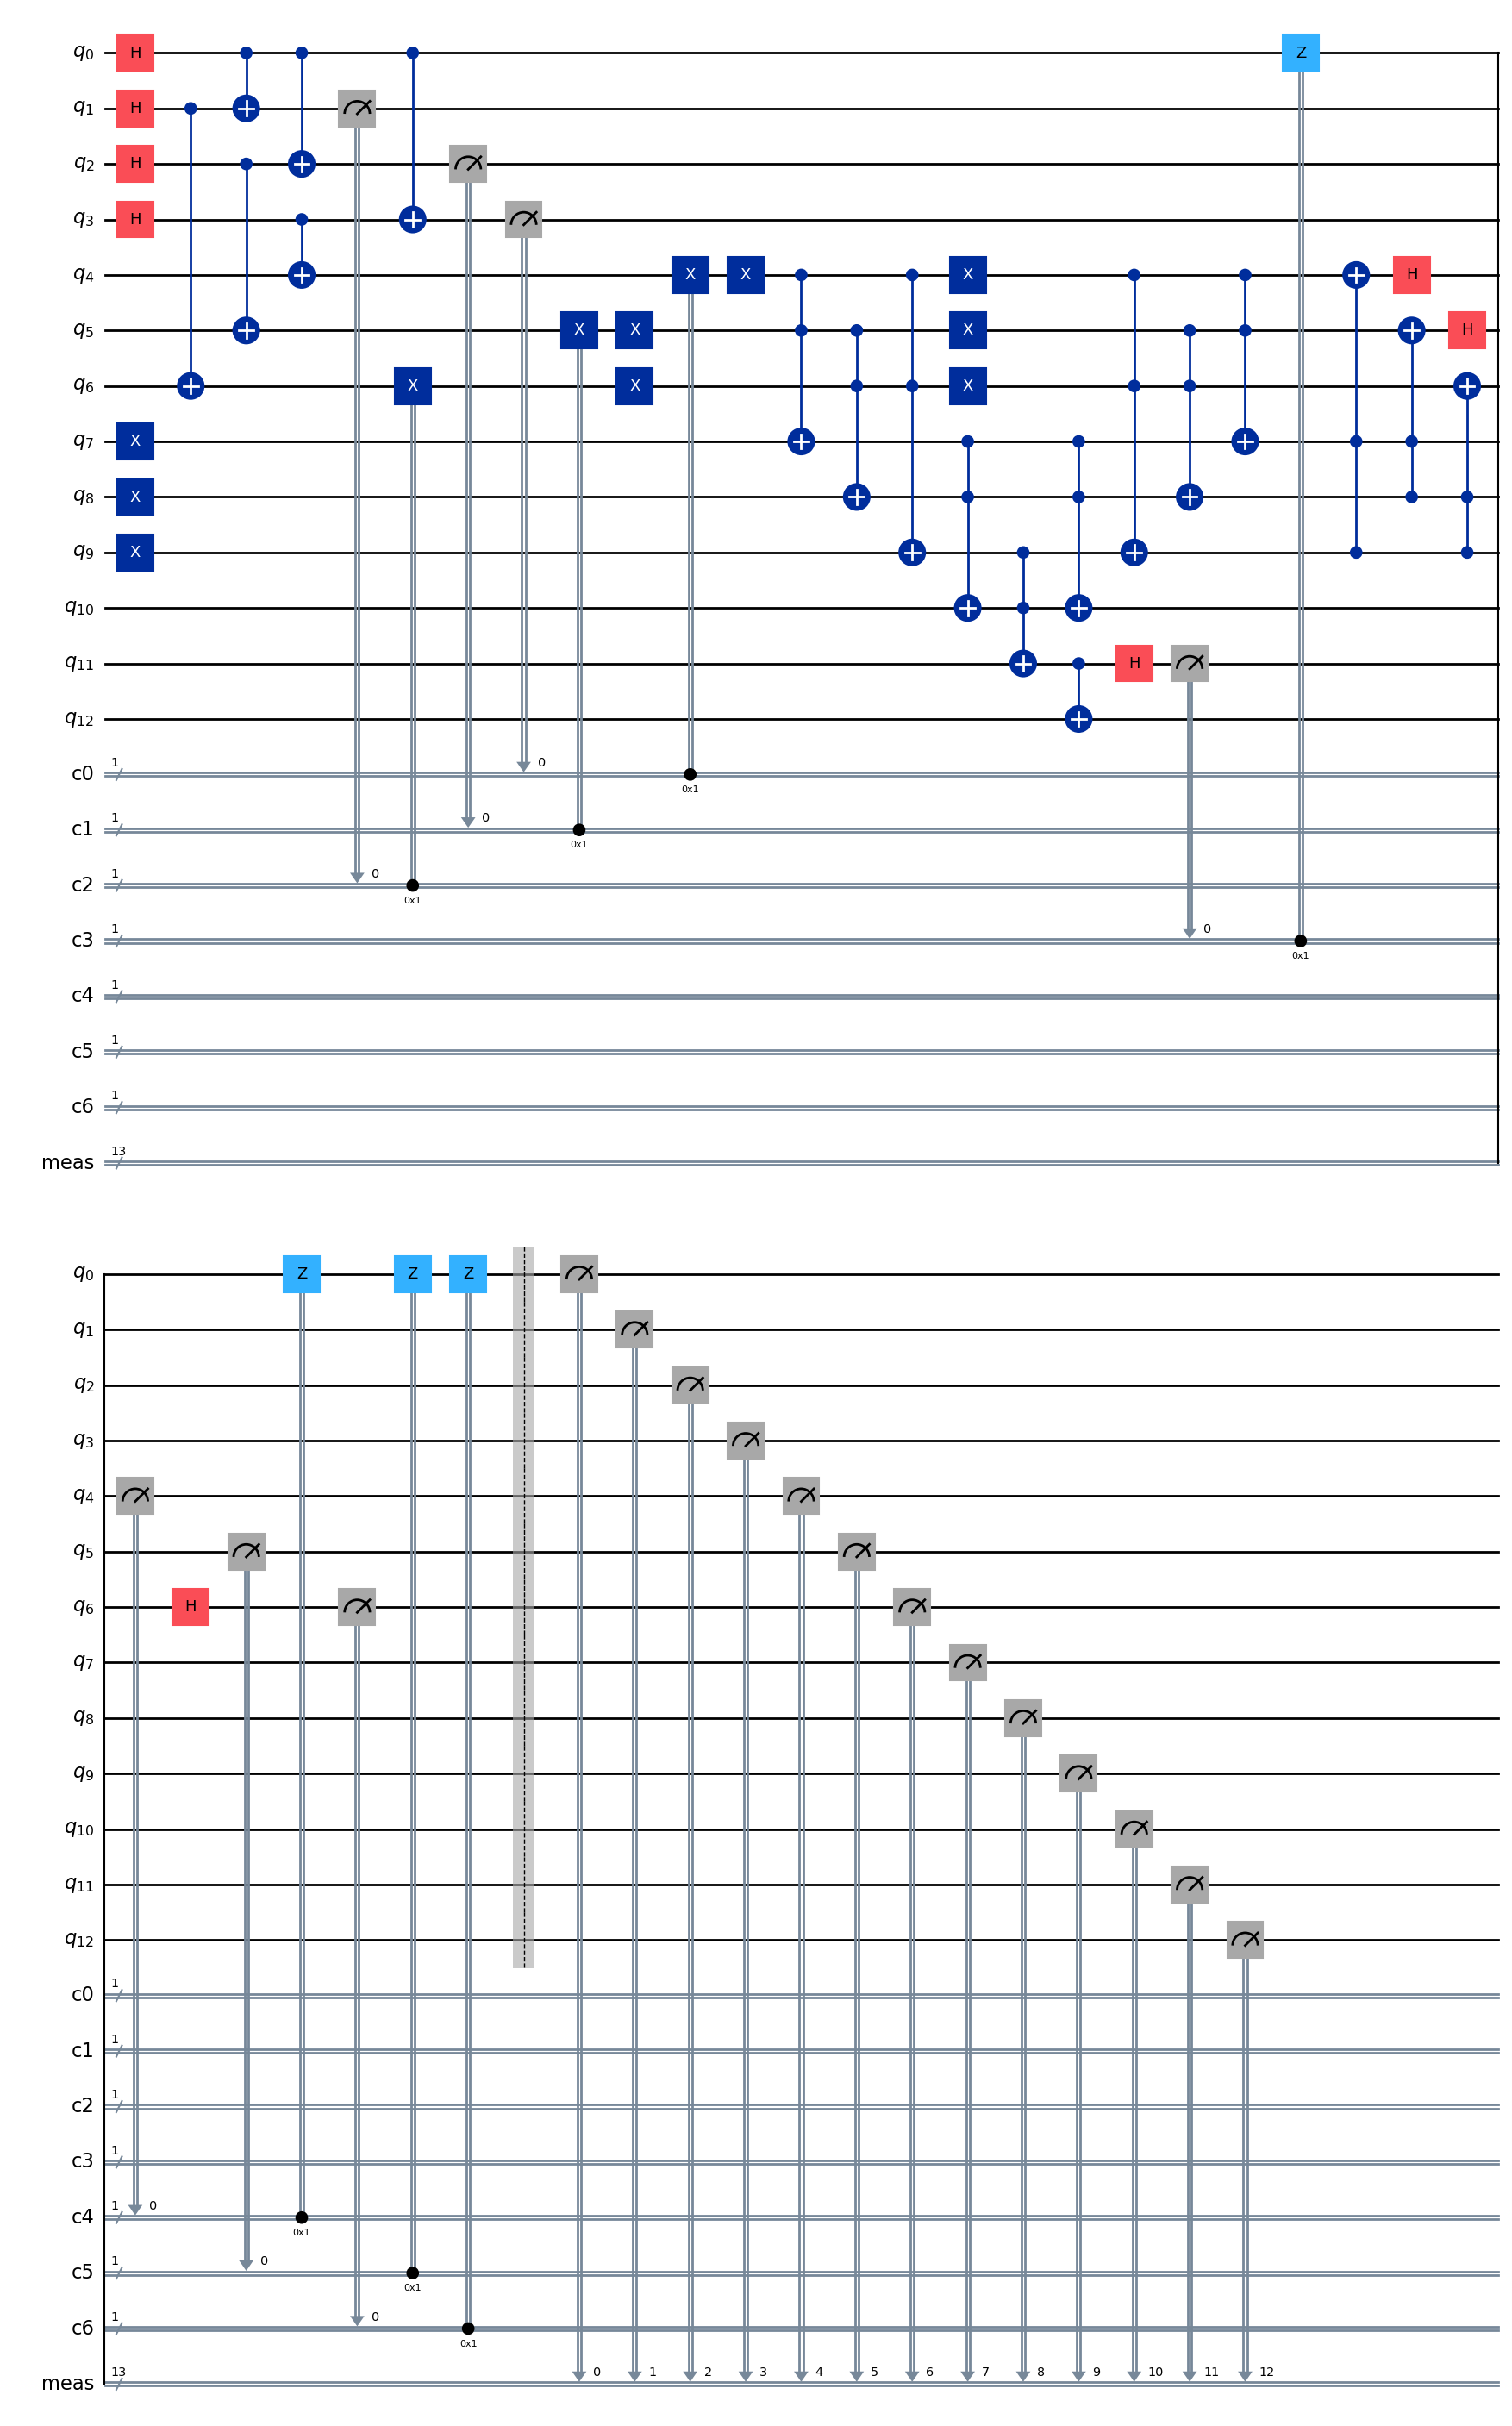

In [4]:
# This code cell is to define the circuit of EE Based D-CNOT. You can visualize the circuit by "circuit.draw("mpl")".

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
    phase_amplitude_damping_error,
)
from numpy import pi
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

qreg_q = QuantumRegister(13, 'q')
creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
creg_c5 = ClassicalRegister(1, 'c5')
creg_c6 = ClassicalRegister(1, 'c6')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2, creg_c3, creg_c4, creg_c5, creg_c6)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[6])
circuit.cx(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.measure(qreg_q[1], creg_c2[0])
circuit.measure(qreg_q[2], creg_c1[0])
circuit.measure(qreg_q[3], creg_c0[0])
circuit.x(qreg_q[4]).c_if(creg_c0, 1)
circuit.x(qreg_q[5]).c_if(creg_c1, 1)
circuit.x(qreg_q[6]).c_if(creg_c2, 1)
circuit.x(qreg_q[4])
circuit.x(qreg_q[5])
circuit.x(qreg_q[6])
circuit.x(qreg_q[7])
circuit.x(qreg_q[8])
circuit.x(qreg_q[9])
circuit.ccx(qreg_q[4], qreg_q[5], qreg_q[7])
circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[8])
circuit.ccx(qreg_q[4], qreg_q[6], qreg_q[9])
circuit.ccx(qreg_q[7], qreg_q[8], qreg_q[10])
circuit.ccx(qreg_q[9], qreg_q[10], qreg_q[11])
circuit.x(qreg_q[4])
circuit.x(qreg_q[5])
circuit.x(qreg_q[6])
circuit.cx(qreg_q[11], qreg_q[12])
circuit.h(qreg_q[11])
circuit.measure(qreg_q[11], creg_c3[0])
circuit.z(qreg_q[0]).c_if(creg_c3, 1)
circuit.ccx(qreg_q[7], qreg_q[8], qreg_q[10])
circuit.ccx(qreg_q[4], qreg_q[6], qreg_q[9])
circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[8])
circuit.ccx(qreg_q[4], qreg_q[5], qreg_q[7])
circuit.ccx(qreg_q[9], qreg_q[7], qreg_q[4])
circuit.ccx(qreg_q[8], qreg_q[7], qreg_q[5])
circuit.ccx(qreg_q[8], qreg_q[9], qreg_q[6])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.measure(qreg_q[4], creg_c4[0])
circuit.measure(qreg_q[5], creg_c5[0])
circuit.measure(qreg_q[6], creg_c6[0])
circuit.z(qreg_q[0]).c_if(creg_c4, 1)
circuit.z(qreg_q[0]).c_if(creg_c5, 1)
circuit.z(qreg_q[0]).c_if(creg_c6, 1)
circuit.measure_all()
#circuit.draw("mpl")

{'00': 502, '01': 0, '10': 0, '11': 498}


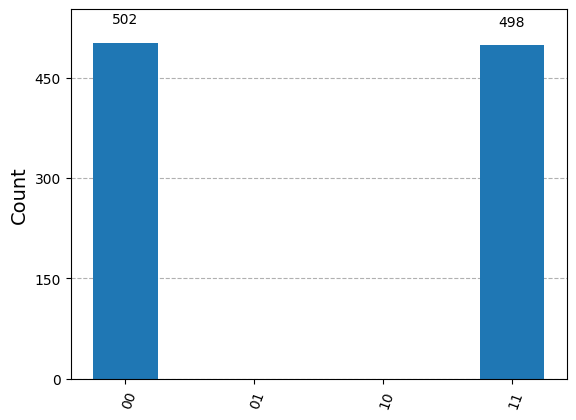

In [3]:
# This code cell is to perform the ideal simulation (without noise).
# Repeately exec circuit for 1000 times.
# The result shows the probability of case:00 + case:11 is 100% which means that the control_qubit is totally related to target_qubit. (D-CNOT's success rate is 100%)
# If case:00 + case:11 is not 100% which means control_qubit is not totally related to target_qubit. (D-CNOT's success rate is not 100%.)
# Especially, if case:00 +case:11 is only 50% which means control_qubit is not realated to target_qubit. (D-CNOT's success rate is 0%.)
sim_ideal = AerSimulator()
counts = sim_ideal.run(circuit,shots=1000).result().get_counts()
target_qubits_counts = {'00': 0, '01':0, '10':0, '11': 0}
for outcome, count in counts.items():
    target_qubits = outcome[12] + outcome[0]  # choose control_qubit(Alice side) q0(outcome[12]) and target_qubit(Bob side) q12(outcome[0])
    target_qubits_counts[target_qubits] += count
print(target_qubits_counts)
plot_histogram(target_qubits_counts)

/Users/ben/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'00': 500, '01': 0, '10': 0, '11': 500}


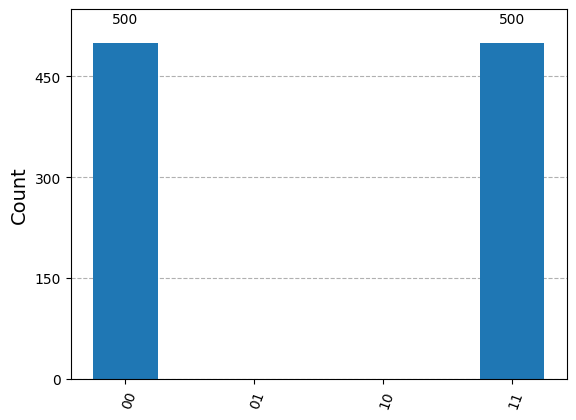

In [5]:
# This code cell is to simulate realistic cases (with noise).
# You can change the parameters of different noise to evaluate the performance of EE based D-CNOT. (PS: you should also adjust the code in the "Create noisy simulator backend" part)
# If the parameter is set to 1 (e.g., the depolarizing rate is set to 1), the entanglement will be totally decoherent.
# The D-CNOT's success rate is always 100%(case:00 + case:11 is 100%) when any type of noise only impacts one entanglement.

p_depo_34 = 0  # error probability for entanglement q3q4，0~1
p_depo_25 = 0  # error probability for entanglement q2q5，0~1
p_depo_16 = 0  # error probability for entanglement q1q6，0~1
p_gate_x_4 = 0 # pauli X error probability in q-gate of single qubit ，0~0.5
p_gate_x_5 = 0 # pauli X error probability in q-gate of single qubit ，0~0.5
p_gate_x_6 = 0 # pauli X error probability in q-gate of single qubit ，0~0.5
p_gate_z_4 = 0 # pauli Z error probability in q-gate of single qubit ，0~0.5
p_gate_z_5 = 0 # pauli Z error probability，in q-gate of single qubit ，0~0.5
p_gate_z_6 = 0 # pauli Z error probability，in q-gate of single qubit ，0~0.5
am_lambda_4 = 0 # the amplitude damping error parameter λ in q-gate of single qubit, 0~0.5
pha_gamma_4 = 0 # the amplitude damping error parameter γ in q-gate of single qubit, 0~0.5
am_lambda_5 = 0 # the amplitude damping error parameter λ in q-gate of single qubit, 0~0.5
pha_gamma_5 = 0 # the amplitude damping error parameter γ in q-gate of single qubit, 0~0.5
am_lambda_6 = 0 # the amplitude damping error parameter in q-gate of single qubit, 0~0.5
pha_gamma_6 = 0 # the amplitude damping error parameter γ in q-gate of single qubit, 0~0.5


# QuantumError objects
depol_noise_q3q4 = depolarizing_error(p_depo_34, 2)
depol_noise_q2q5 = depolarizing_error(p_depo_25, 2)
depol_noise_q1q6 = depolarizing_error(p_depo_16, 2)

pauli_error_x_q4 = pauli_error([('X',p_gate_x_4), ('I', 1 - p_gate_x_4)])
pauli_error_z_q4 = pauli_error([('Z',p_gate_z_4), ('I', 1 - p_gate_z_4)])
pauli_error_x_q5 = pauli_error([('X',p_gate_x_5), ('I', 1 - p_gate_x_5)])
pauli_error_z_q5 = pauli_error([('Z',p_gate_z_5), ('I', 1 - p_gate_z_5)])
pauli_error_x_q6 = pauli_error([('X',p_gate_x_6), ('I', 1 - p_gate_x_6)])
pauli_error_z_q6 = pauli_error([('Z',p_gate_z_6), ('I', 1 - p_gate_z_6)])
error_gate_x_q3q4 = pauli_error_x_q4.tensor(pauli_error_x_q4) # pauli X error probability in q-gate of double qubit ，0~1.
error_gate_z_q3q4 = pauli_error_z_q4.tensor(pauli_error_z_q4) # # pauli Z error probability in q-gate of double qubit ，0~1.
error_gate_x_q2q5 = pauli_error_x_q5.tensor(pauli_error_x_q5)
error_gate_z_q2q5 = pauli_error_z_q5.tensor(pauli_error_z_q5)
error_gate_x_q1q6 = pauli_error_x_q6.tensor(pauli_error_x_q6)
error_gate_z_q1q6 = pauli_error_z_q6.tensor(pauli_error_z_q6)

pa_damping_error_q4 = phase_amplitude_damping_error(am_lambda_4, pha_gamma_4)
pa_damping_error_q5 = phase_amplitude_damping_error(am_lambda_5, pha_gamma_5)
pa_damping_error_q6 = phase_amplitude_damping_error(am_lambda_6, pha_gamma_6)
error_gate_pa_damping_q3q4 = pa_damping_error_q4.tensor(pa_damping_error_q4) # the phase amplitude damping error in q-gate of double qubit, 0~1
error_gate_pa_damping_q2q5 = pa_damping_error_q5.tensor(pa_damping_error_q5)
error_gate_pa_damping_q1q6 = pa_damping_error_q6.tensor(pa_damping_error_q6)

# Create noisy simulator backend (adjusting this part to explore the different noise)
noise_set = NoiseModel()
noise_set.add_quantum_error(depol_noise_q3q4, ['cx'], [3,4])
noise_set.add_quantum_error(depol_noise_q2q5, ['cx'], [2,5])
noise_set.add_quantum_error(depol_noise_q1q6, ['cx'], [1,6])
#noise_set.add_quantum_error(error_gate_x_q3q4, ['cx'], [3,4])
#noise_set.add_quantum_error(error_gate_z_q3q4, ['cx'], [3,4])
#noise_set.add_quantum_error(error_gate_x_q2q5, ['cx'], [2,5])
#noise_set.add_quantum_error(error_gate_z_q2q5, ['cx'], [2,5])
#noise_set.add_quantum_error(error_gate_x_q1q6, ['cx'], [1,6])
#noise_set.add_quantum_error(error_gate_z_q1q6, ['cx'], [1,6])
#noise_set.add_quantum_error(error_gate_pa_damping_q3q4, ['cx'], [3,4])
#noise_set.add_quantum_error(error_gate_pa_damping_q2q5, ['cx'], [2,5])
#noise_set.add_quantum_error(error_gate_pa_damping_q1q6, ['cx'], [1,6])

sim_noise = AerSimulator(noise_model=noise_set)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circuit_tnoise = passmanager.run(circuit)

# Run and get counts
counts = sim_noise.run(circuit_tnoise,shots=1000).result().get_counts()
target_qubits_counts = {'00': 0, '01':0, '10':0, '11': 0}
for outcome, count in counts.items():
    target_qubits = outcome[0]+outcome[12]  # choose control_qubit(Alice side) q0(outcome[0]) and target_qubit(Bob side) q12(outcome[3])
    target_qubits_counts[target_qubits] += count
print(target_qubits_counts)
plot_histogram(target_qubits_counts)